# Caracterización piezoelectricos

In [1]:
import urllib 
import cv2
import numpy as np 
import time 
import os
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftfreq
from scipy import optimize
%matplotlib inline

## Primeras imágenes

En primer lugar se leen las imagenes tomadas en el laboratorio para poder hacer mediciones, se implementa el siguiente ciclo

In [6]:
datadir  = "images"
path = os.path.join(datadir)
im = []
for i in os.listdir(path):
    im.append(cv2.imread(os.path.join(path,i),cv2.IMREAD_GRAYSCALE))

Se guardan las imagenes en escala de grises dentro de la variable **im**

In [7]:
np.shape(im)

(16, 722, 1280)

Veamos ahora todas las imagenes que se van a analizar 

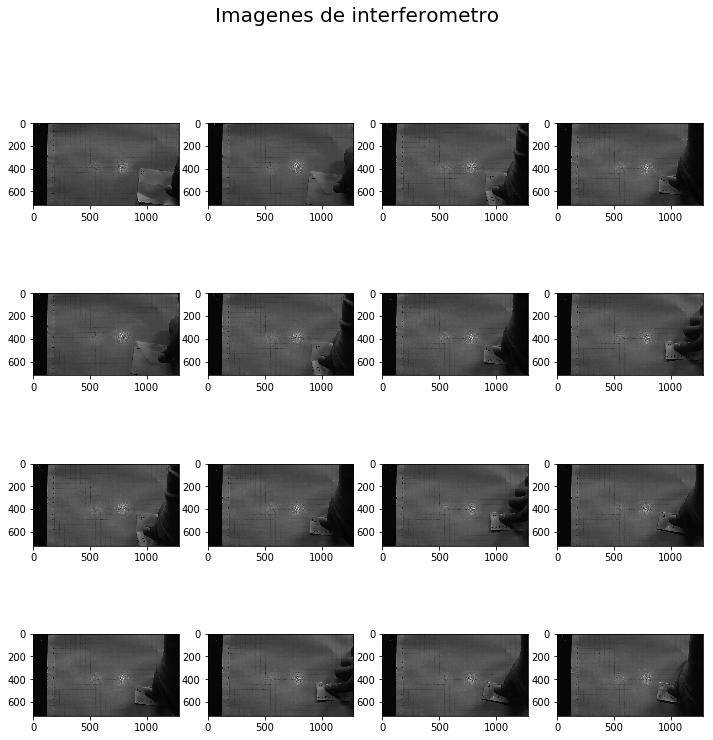

In [8]:
fig, ax = plt.subplots(4, 4, figsize = (12, 12))
fig.suptitle('Imagenes de interferometro',fontsize = "20")
#fig.tight_layout(pad = 0.1, rect = [0, 0, 0.9, 0.9])
for x, y in [(i,j) for i in range(4) for j in range (4)]:
    ax[x,y].imshow(im[x+y],cmap = "gray")
    

Para poder hacer el análisis del corriemiento se elije una linea en el píxel 400 para ver la intensidad que se tiene en el patrón de difracción 

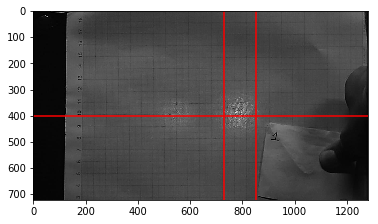

In [9]:
plt.imshow(im[1],cmap = "gray")
plt.axhline(y=400, color='r', linestyle='-')
plt.axvline(x=730, color='r', linestyle='-')
plt.axvline(x=850, color='r', linestyle='-')




Veamos entonces las intensidades sobre la línea del pixel 400 para cada una de las imagenes que se están analizando , entonces


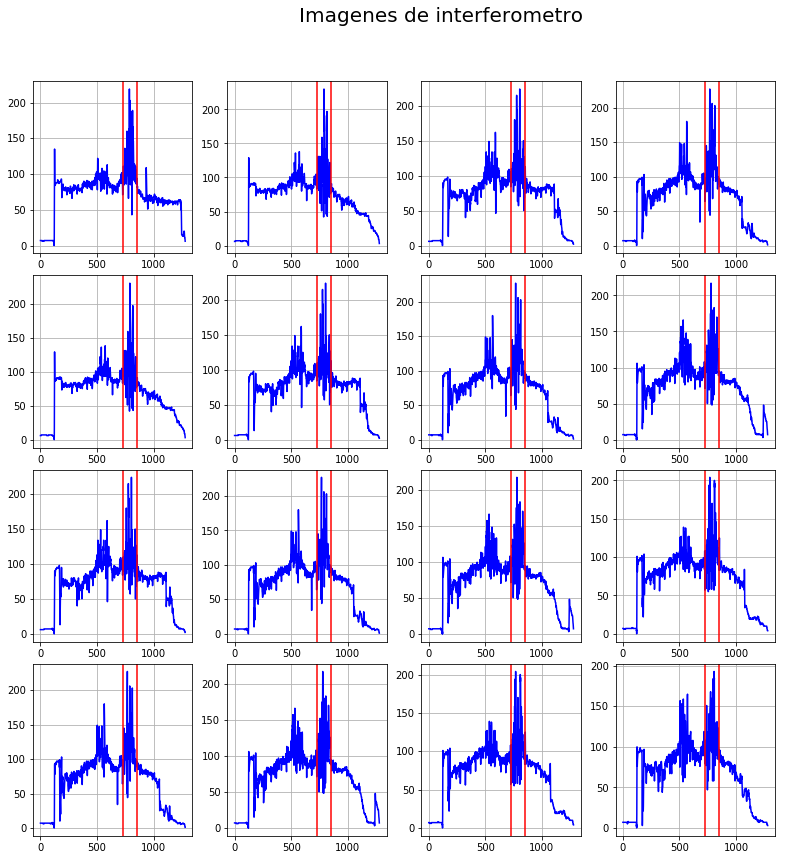

In [10]:
fig, ax = plt.subplots(4, 4, figsize = (12, 12))
fig.suptitle('Imagenes de interferometro',fontsize = "20")
fig.tight_layout(pad = 0.1, rect = [0, 0, 0.9, 0.9])
for x, y in [(i,j) for i in range(4) for j in range (4)]:
    ax[x,y].plot(im[x+y][400],"b-")
    ax[x,y].axvline(x=730, color='r', linestyle='-')
    ax[x,y].axvline(x=850, color='r', linestyle='-')
    ax[x,y].grid(True)
    #ax[x,y].set_xlim(730,850)

Ahora se hace la transofrmada rápida de Fourier de cada uno de los anteriores perfiles, los cuales deben coincidir.

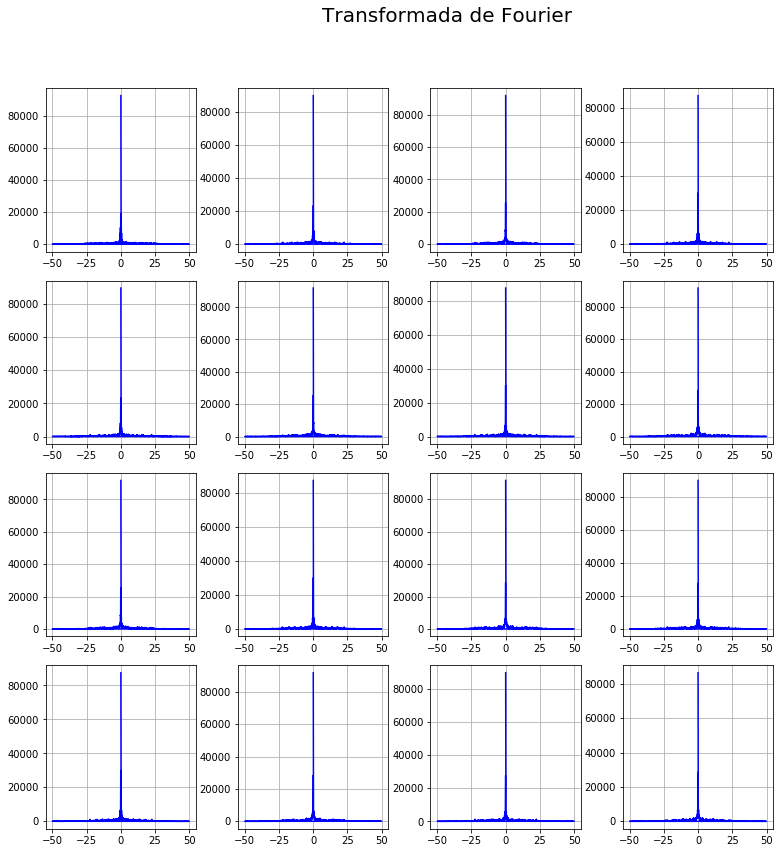

In [61]:
n = np.shape(im[0][400])
f = 100.
T = 1./f

xf =[]; yf = []
#plt.plot(im[4][400])
for i in range(len(im)):
    yf.append(fft(im[i][400]))
    xf.append(fftfreq(len(im[i][400])) * f)



fig, ax = plt.subplots(4, 4, figsize = (12, 12))
fig.suptitle('Transformada de Fourier',fontsize = "20")
fig.tight_layout(pad = 0.8, rect = [0, 0, 0.9, 0.9])
for x, y in [(i,j) for i in range(4) for j in range (4)]:
    ax[x,y].plot(xf[x+y],np.abs(yf[x+y]),"b-")
    ax[x,y].grid(True)
    #ax[x,y].set_xlim(730,850)

La diferencia de fase en un interferometro de do haces está dada por 

$$\phi = 2\pi d \sigma \cos \alpha$$

En donde 

$$d : \text{Diferencia de camino óptico}$$

$$\alpha = \text{Ángulo entre la dirección del haz y el angulo de observación}$$

$$\sigma = \frac{1}{\lambda}: \text{Número de onda}$$

Por tanto la ecuación que se utiliza será

$$\boxed{\phi=\frac{2\pi d}{\lambda}}$$

En este caso se utiliza un laser rojo con longitud de onda $\lambda = (635 \pm xxx)nm$

Ahora, para extraer la fase de nuestors datos se utiliza la transformada de Fourier calculada anteriormente. Tenemos una relación útil que permite calcular facilmente la fase de la longitud seleccionada 

$$\phi = \tan^{-1}\left(\frac{Im(c(x,y))}{Re(c(x,y))})\right)$$

In [1]:
fase = np.zeros(len(im))
for i in range(len(im)):
    fase[i] = np.max(np.arctan(np.imag(yf[i])/np.real(yf[i])))

fase

NameError: name 'np' is not defined

In [60]:
fase-np.roll(fase,-1)

array([ 0.00563602, -0.00106356, -0.00454454,  0.00066713,  0.00027156,
        0.00576976, -0.00150529, -0.00484466, -0.00056485,  0.000148  ,
        0.00403439, -0.00292449,  0.0102259 , -0.01052013,  0.00302471,
       -0.00380993])

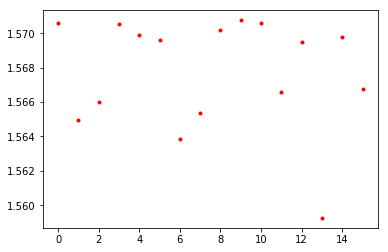

In [36]:
plt.plot(f,"r.")

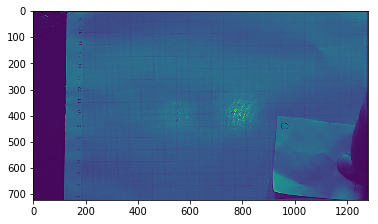

In [48]:
plt.imshow(im[0])

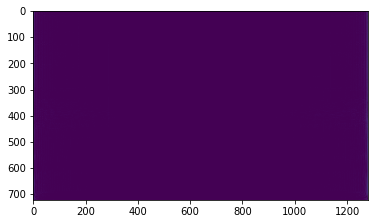

In [70]:
#plt.scatter(np.max(fftfreq(len(im[0]))*f),np.max(np.abs(fft(im[0]))), s=5, c='red', marker='o')
plt.imshow(np.abs(fft(im[0])))


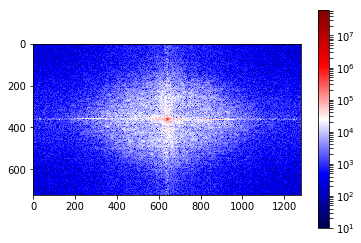

In [110]:
from matplotlib.colors import LogNorm
ftimage = np.fft.fft2(im[1])
ftimage = np.fft.fftshift(ftimage)
plt.imshow(np.abs(ftimage),norm = LogNorm(vmin=10),cmap = "seismic")
plt.colorbar()

In [94]:
np.max(np.imag(ftimage))

3444258.430560664

In [97]:
print(np.max(np.arctan(np.imag(ftimage[0])/np.real(ftimage[0]))))



1.5690513723534174


In [111]:
n = np.shape(im[0])
f = 100.
T = 1./f
ftimage = []
for i in range(len(im)):
    x = np.fft.fft2(im[i])
    x = np.fft.fftshift(x)
    ftimage.append(x)


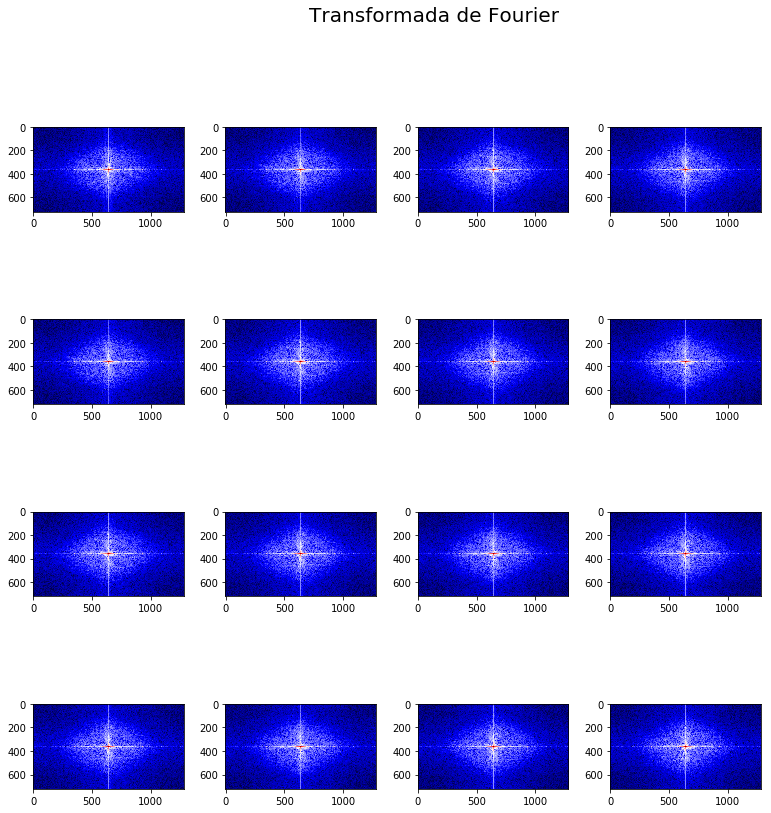

In [114]:
fig, ax = plt.subplots(4, 4, figsize = (12, 12))
fig.suptitle('Transformada de Fourier',fontsize = "20")
fig.tight_layout(pad = 0.8, rect = [0, 0, 0.9, 0.9])
for x, y in [(i,j) for i in range(4) for j in range (4)]:
    ax[x,y].imshow(np.abs(ftimage[x+y]),norm = LogNorm(vmin=100),cmap = "seismic")
    #ax[x,y].grid(True)

In [115]:
fase = np.zeros(len(im))
for i in range(len(im)):
    fase[i] = np.max(np.arctan(np.imag(ftimage[i])/np.real(ftimage[i])))

fase

array([1.57079209, 1.57079203, 1.57079624, 1.57079609, 1.57079136,
       1.57079583, 1.57079308, 1.57079524, 1.57079539, 1.57079313,
       1.57079616, 1.57079624, 1.57079564, 1.57079059, 1.57079507,
       1.57078529])

In [128]:
d = []
for i in range(1,len(fase)):
    d.append(fase[0]-fase[i])
    print(fase[0]-fase[i],i)
print (len(d))

6.108904360146994e-08 1
-4.15252631236207e-06 2
-4.006060714489834e-06 3
7.272805320202025e-07 4
-3.742972400244682e-06 5
-9.89187884048448e-07 6
-3.155068883042844e-06 7
-3.3035797861735716e-06 8
-1.041874855278735e-06 9
-4.073062272347272e-06 10
-4.148655145197466e-06 11
-3.5486126745976065e-06 12
1.493264093932467e-06 13
-2.984536394023962e-06 14
6.793191106524432e-06 15
15


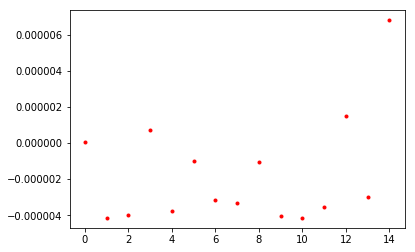

In [132]:
plt.plot(d,"r.")

# Análisis con imágenes de mayor resolución


In [8]:
datadir  = "images/"
categories = ["P1","P21","P22","P3"]
path = os.path.join(datadir)
im = []; piezoelectrico = []
for category in categories:
    path = os.path.join(datadir,category)
    clase = categories.index(category) + 1
    for i in os.listdir(path):
        im.append(cv2.imread(os.path.join(path,i),cv2.IMREAD_GRAYSCALE))
        piezoelectrico.append(clase)

In [4]:
print (np.shape(im),np.shape(piezoelectrico))

(84, 3456, 5184) (84,)


# Piezoelectrico 1

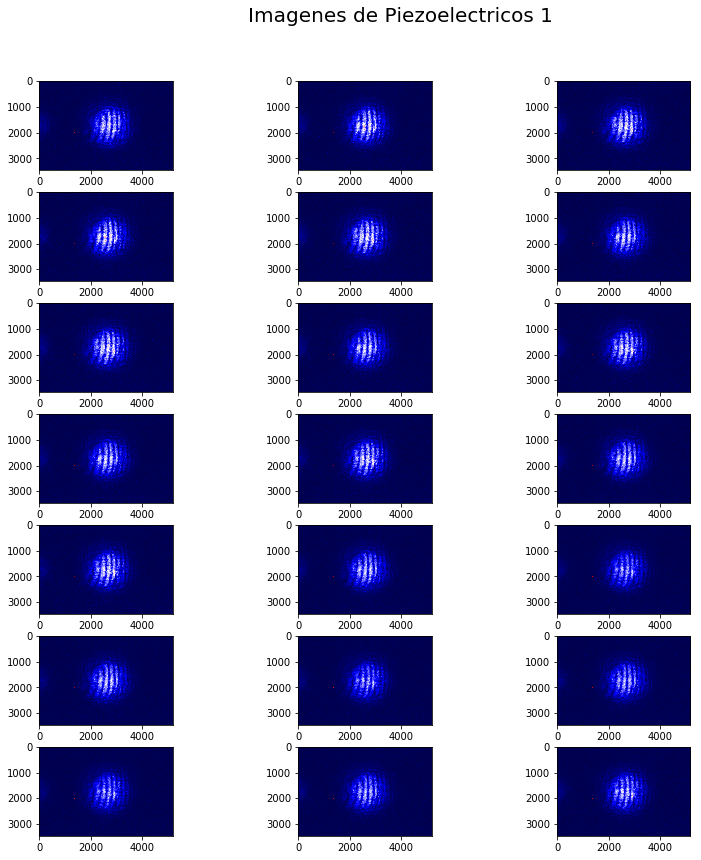

In [96]:

fig, ax = plt.subplots(7, 3, figsize = (12, 12))
fig.suptitle('Imagenes de Piezoelectricos 1',fontsize = "20")
fig.tight_layout(pad = 0.1, rect = [0, 0, 0.9, 0.9])
for x, y in [(i,j) for i in range(7) for j in range (3)]:
    ax[x,y].imshow(p1[x+y],cmap = "seismic")

Por facilidad y reducir el ruido y datos que no son necesarios se recortan las imágenes de la siguiente manera

1728.0


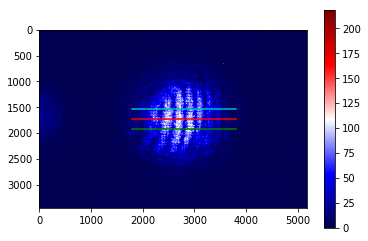

In [42]:
print(len(im[0])/2)
p1 = im[0:21]
plt.imshow(im[0],cmap = "seismic")
plt.axhline(y=len(im[0])/2.,xmin=1800./np.shape(im[0])[1],xmax=3800./np.shape(im[0])[1], color='r', linestyle='-')
plt.axhline(y=len(im[0])/2.+200,xmin=1800./np.shape(im[0])[1],xmax=3800./np.shape(im[0])[1], color='g', linestyle='-')
plt.axhline(y=len(im[0])/2.-200,xmin=1800./np.shape(im[0])[1],xmax=3800./np.shape(im[0])[1], color='c', linestyle='-')
plt.colorbar()

# Se almacenan los espectros para el piezoelectrico 1
pp1 = []; 
for i in range(len(p1)+1):
    pp1.append(im[i][int(len(im[1])/2)][1800:3800])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: 5735.075323
         Iterations: 127
         Function evaluations: 227
Optimization terminated successfully.
         Current function value: 12450.792805
         Iterations: 185
         Function evaluations: 339
Optimization terminated successfully.
         Current function value: 17221.158515
         Iterations: 171
         Function evaluations: 308
Optimization terminated successfully.
         Current function value: 11289.870899
         Iterations: 166
         Function evaluations: 304
Optimization terminated successfully.
         Current function value: 12596.192331
         Iterations: 238
         Function evaluations: 427
Optimization terminated successfully.
         Current function value: 11222.688688
         Iterations: 198
         Function evaluations: 353

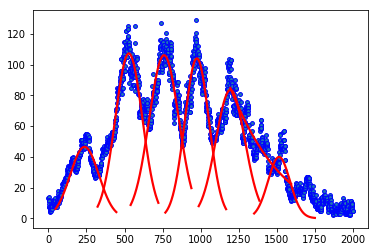

In [297]:
from scipy.signal import find_peaks
from scipy.optimize import curve_fit, fmin
xpp1 = np.linspace(0,len(pp1[0]),len(pp1[0]))


def Gaussian(x,a,b,c):
    val = a * np.exp(-(x - b)**2 / (2*c**2))
    return val

def Picos(imagen,pico):
    peaks, _ = find_peaks(pp1[imagen], distance = 150, height = 20)
    
    def test_min(p):
        return sum((pp1[imagen][peaks[pico]-100:peaks[pico]+100]-Gaussian(xpp1[peaks[pico]-100:peaks[pico]+100],p[0],p[1],p[2]))**2)
    
    a = pp1[imagen][peaks[pico]]
    b = peaks[pico]
    c = b 
    
    popt = fmin(test_min,[a,b,c])
    
    return popt, peaks

imagen = 1
plt.scatter(xpp1, pp1[imagen], edgecolors='b',s =15)

for pico in range(8):
    popt, peaks = Picos(imagen,pico)
    #plt.plot(peaks, pp1[imagen][peaks], "ko")
    plt.plot(xpp1[peaks[pico]-200:peaks[pico]+200], Gaussian(xpp1[peaks[pico]-200:peaks[pico]+200], popt[0], popt[1], popt[2]),"r-",lw = 2.2)


In [298]:
np.max(Gaussian(xpp1[peaks[8]-200:peaks[8]+200], popt[0], popt[1], popt[2]))

39.91537196824715